## K-means method
### Setting up for clustering analysis

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [4]:
%matplotlib inline
plt.figure(figsize=(7,4))

<Figure size 700x400 with 0 Axes>

<Figure size 700x400 with 0 Axes>

In [9]:
iris = datasets.load_iris()

X = scale(iris.data)
y = pd.DataFrame(iris.target)
variable_names = iris.feature_names
X[0:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [11]:
clustering = KMeans(n_clusters=3, random_state=5)
clustering.fit(X)

KMeans(n_clusters=3, random_state=5)

## Plotting your model outputs


In [12]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length','Sepal_width','Petal_Length','Petal_Width']
y.columns =['Targets']

Text(0.5, 1.0, 'K-Means Classification')

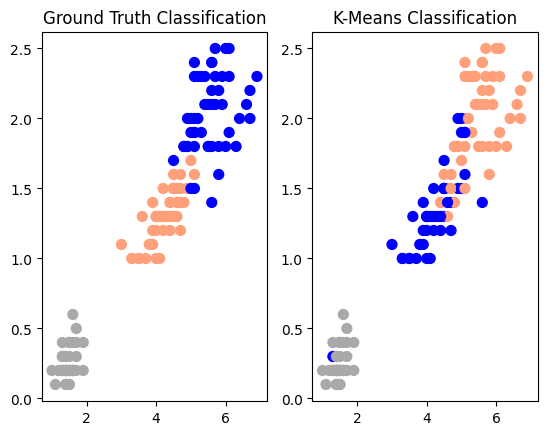

In [13]:
color_theme = np.array(['darkgray','lightsalmon','blue'])
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50)
plt.title('K-Means Classification')

Text(0.5, 1.0, 'K-Means Classification')

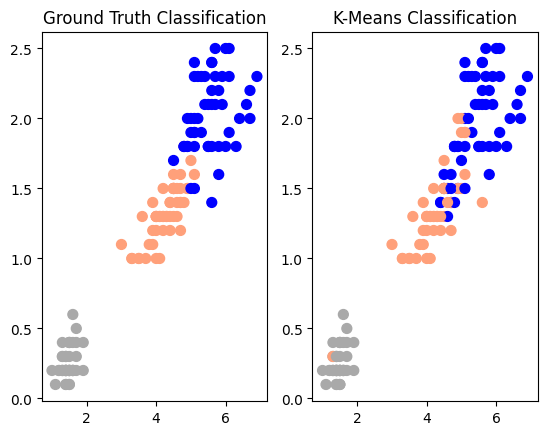

In [14]:
relabel = np.choose(clustering.labels_, [0,2,1]).astype(np.int64)

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[relabel], s=50)
plt.title('K-Means Classification')

## Evaluate your clustering results

In [10]:
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.80      0.74      0.77        50
           2       0.76      0.84      0.80        50

    accuracy                           0.85       150
   macro avg       0.86      0.85      0.85       150
weighted avg       0.86      0.85      0.85       150



In [15]:
print(clustering.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 2 1
 1 1]


In [20]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [17]:
iris_df

,Sepal_Length,Sepal_width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
